In [ ]:
import keras
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional, InputLayer

In [ ]:
max_vocab=400000
max_length=30

In [ ]:
with open('/content/drive/MyDrive/fsacd_x_train.pickle', 'rb') as handle:
    X_train = pickle.load(handle)

with open('/content/drive/MyDrive/fsacd_x_test.pickle', 'rb') as handle:
    X_test = pickle.load(handle)
    
with open('/content/drive/MyDrive/fsacd_y_train.pickle', 'rb') as handle:
    Y_train = pickle.load(handle)
    
with open('/content/drive/MyDrive/fsacd_y_test.pickle', 'rb') as handle:
    Y_test = pickle.load(handle)

with open('/content/drive/MyDrive/embmat.pickle', 'rb') as handle:
    embedding_matrix = pickle.load(handle)


In [ ]:
model = keras.models.Sequential()

model.add(InputLayer(input_shape=(max_length)))
model.add(Embedding(max_vocab, 300, weights=[embedding_matrix], input_length=max_length,mask_zero=True, trainable=False))
model.add(Bidirectional(LSTM(64)))
# model.add(Bidirectional(LSTM(32)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [ ]:
# Compile the Model

model.compile(keras.optimizers.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history_model = model.fit(X_train,Y_train, batch_size=128, epochs=20,validation_split=0.05, verbose=True)

Epoch 1/20
11584/11584 [==============================] - 460s 39ms/step - loss: 0.6387 - accuracy: 0.7098 - val_loss: 0.4806 - val_accuracy: 0.7880
Epoch 2/20
11584/11584 [==============================] - 419s 36ms/step - loss: 0.4874 - accuracy: 0.7900 - val_loss: 0.4518 - val_accuracy: 0.8018
Epoch 3/20
11584/11584 [==============================] - 412s 36ms/step - loss: 0.4585 - accuracy: 0.8040 - val_loss: 0.4357 - val_accuracy: 0.8106
Epoch 4/20
11584/11584 [==============================] - 405s 35ms/step - loss: 0.4424 - accuracy: 0.8121 - val_loss: 0.4233 - val_accuracy: 0.8168
Epoch 5/20
11584/11584 [==============================] - 403s 35ms/step - loss: 0.4316 - accuracy: 0.8166 - val_loss: 0.4228 - val_accuracy: 0.8164
Epoch 6/20
11584/11584 [==============================] - 402s 35ms/step - loss: 0.4233 - accuracy: 0.8203 - val_loss: 0.4178 - val_accuracy: 0.8195
Epoch 7/20
11584/11584 [==============================] - 402s 35ms/step - loss: 0.4165 - accuracy: 0.8236

In [ ]:
model.save('/content/drive/MyDrive/fsact_lstm_w_neu')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/fsact_lstm_w_neu/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/fsact_lstm_w_neu/assets


In [ ]:
# Calculate No. of epochs
n_epochs=len(history_model.history['loss'])
e = list(range(1,n_epochs+1))

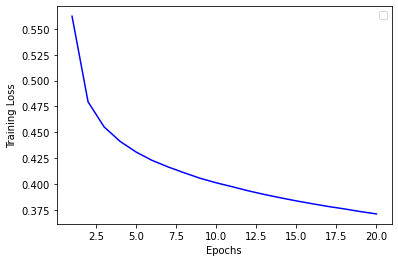

In [ ]:
# Training Loss
plt.plot(e,history_model.history['loss'],'b')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

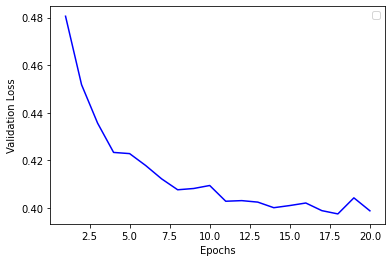

In [ ]:
# Validation Loss
plt.plot(e,history_model.history['val_loss'],'b')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

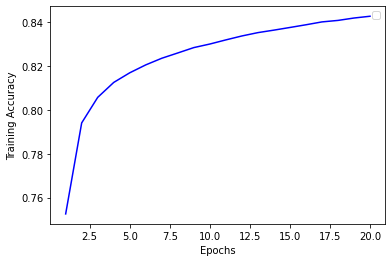

In [ ]:
# Training Accuracy
plt.plot(e,history_model.history['accuracy'],'b')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

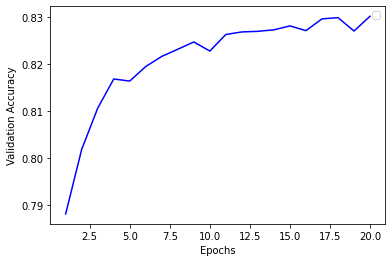

In [ ]:
# Validation Accuracy
plt.plot(e,history_model.history['val_accuracy'],'b')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, Y_test)

20903/20903 [==============================] - 119s 6ms/step - loss: 0.4034 - accuracy: 0.8290


[0.40344181656837463, 0.8290056586265564]